<a href="https://colab.research.google.com/github/Followb1ind1y/D2L_Pytorch_Study_Notes/blob/main/05_D2L_Multilayer_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dive into Deep Learning 中文学习笔记** 
# **5. 多层感知机 （Multilayer Perceptrons）**

## **5.1. 多层感知机（Multilayer Perceptrons）**

我们已经介绍了包括线性回归和 softmax 回归在内的单层神经网络。然而深度学习主要关注多层模型。在本节中，我们将以 **多层感知机（*multilayer perceptron，MLP*）** 为例，介绍多层神经网络的概念。

### **5.1.1. 隐藏层（Hidden Layers）**



**5.1.1.1. 线性模型的局限性（Limitations of Linear Models）**

线性意味着较弱的单调性假设，即我们的任何特征的增加必须总是导致我们模型的输出增加（如果相应的权重是正的），或者总是导致我们模型的输出减少（如果相应的权重是负的）。有时这很有意义。而有时，特征之间不会有任何关系。


**5.1.1.2. 采用隐藏层（Incorporating Hidden Layers）**

我们可以通过加入一个或多个 **隐藏层（*hidden layers*）** 来克服线性模型的限制。最简单的方法是将许多完全连接的层堆叠在一起。每一层都会反馈到上面的层中，直到我们产生输出。我们可以把前 $L-1$ 层看作是我们的表征，最后一层是我们的线性预测器。这种结构通常被称为 **多层感知器（*multilayer perceptron*）**，通常缩写为 *MLP*。下图展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。


<center><img src="https://drive.google.com/uc?export=view&id=1jv3zBp73V28sAJD2J7Jj4Ex-LJl-PDHD" width=450px /></center>

上图所示的多层感知机中，输入和输出个数分别为 4 和 3，中间的隐藏层中包含了 5 个 **隐藏单元（*hidden unit*）**。由于输入层不涉及计算，图中的多层感知机的层数为 2。隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。


**5.1.1.3. 从线性到非线性（From Linear to Nonlinear）**

我们用矩阵 $\mathbf{X} \in \mathbb{R}^{n \times d}$ 表示一个 $n$ 实例的小批量样本，每个实例有 $d$ 输入（特征）。对于只有一个隐藏层的 MLP，其隐藏层有 $h$ 个隐藏单元，我们用 $\mathbf{H} \in \mathbb{R}^{n \times h}$ 表示隐藏层的输出（也称为隐藏层变量或隐藏变量）。由于隐藏层和输出层都是全连接的，我们可以得到隐藏层权重 $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$  和偏差 $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$，输出层权重 $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$，偏差 $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$。这样我们就可以计算出单隐层 MLP 的输出 $\mathbf{O} \in \mathbb{R}^{n \times q}$为，

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为 $\mathbf{W}$，偏差参数为 $\mathbf{b}$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。

为了实现多层架构的潜力，我们还需要一个关键因素：一个 **非线性激活函数（*activation function*）** $\sigma$，在变换后应用于每个隐藏单元。例如，一个流行的选择是 **ReLU（*Rectified Linear Unit*）激活函数** : $\sigma(x) = \mathrm{max}(0, x)$。激活函数 $\sigma(\cdot)$ 的输出被称为 **激活（*activations*）**。一般来说，有了激活函数，就不可能再把我们的 MLP 折叠成一个线性模型了。

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

为了建立更普遍的 MLP，我们可以继续堆叠这样的隐藏层，例如，$\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$ 和 $\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$ ，从而产生更多表达式模型。

### **5.1.2. 激活函数（Activation Functions）**

激活函数通过计算加权和并进一步加入偏差来决定一个神经元是否应该被激活。它们是将输入信号转化为输出的可微分算子，而它们中的大多数都增加了 **非线性（*non-linearity*）**。

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

**5.1.2.1. ReLU函数（ReLU Function）**

**ReLU（*rectified linear unit*）**函数提供了一个很简单的非线性变换。给定元素 $x$，该函数定义为:

$$\operatorname{ReLU}(x) = \max(x, 0).$$

可以看出，ReLU 函数只保留正数元素，并将负数元素清零。

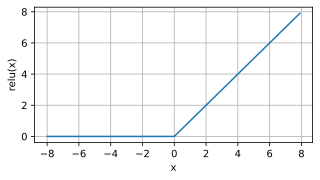

In [4]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

显然，当输入为负数时，ReLU 函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

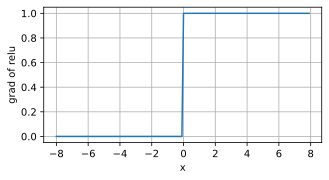

In [5]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

使用 ReLU 的原因是它的导数表现得特别好：它们要么消失，要么只是让参数通过。这使得优化表现得更好，而且它缓解了有据可查的梯度消失的问题。

**5.1.2.2. Sigmoid函数（Sigmoid Function）**

**Sigmoid函数（*Sigmoid Function*）** 可以将元素的值变换到0和1之间。由于这个原因，Sigmoid 通常被称为 **压缩函数（*squashing function*）**：它将范围为（-inf, inf）的任何输入压扁为范围为（0, 1）的某个值。

$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

当我们想把输出解释为二元分类问题的概率时，Sigmoid 仍然被广泛用作输出单元的激活函数：你可以把Sigmoid 看作 Softmax的一个特例。然而，它目前逐渐被更简单、更容易训练的ReLU所取代。

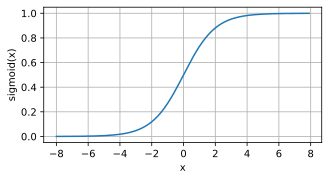

In [6]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

依据链式法则，sigmoid函数的导数为

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

下面是sigmoid函数的导数图。请注意，当输入为0时，sigmoid函数的导数达到最大值0.25。当输入从0向任何一个方向发散时，导数接近0。

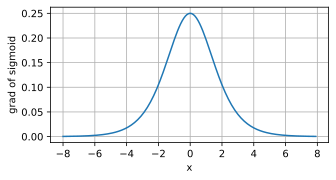

In [7]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

**5.1.2.3. Tanh函数（Tanh Function）**

**Tanh（双曲正切）函数（*Tanh Function*）** 可以将元素的值变换到 -1 和 1 之间：

$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

我们接着绘制 tanh 函数。当输入接近 0 时，tanh 函数接近线性变换。虽然该函数的形状和 sigmoid 函数的形状很像，但 tanh 函数在坐标系的原点上对称。

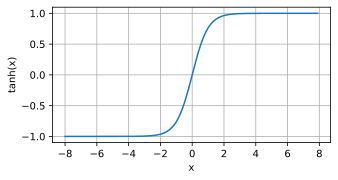

In [8]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

依据链式法则，tanh函数的导数为：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

下面绘制了 tanh 函数的导数。当输入为 0 时，tanh 函数的导数达到最大值 1；当输入越偏离 0 时，tanh 函数的导数越接近 0。

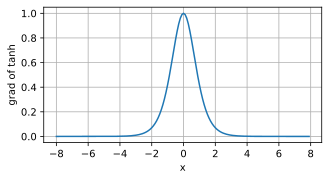

In [9]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## **5.2. 多层感知机的实现（Implementation of Multilayer Perceptrons）**

In [10]:
import torch
from torch import nn
from d2l import torch as d2l

### **5.2.1. 多层感知机的从零开始实现（Implementation from Scratch）**

**5.2.1.1. 初始化模型参数（Initializing Model Parameters）**

这里继续使用 Fashion-MNIST 数据集。我们将使用多层感知机对图像进行分类。Fashion-MNIST 数据集中图像形状为 $28 \times 28$，类别数为 10。本节中我们依然使用长度为 $28 \times 28 = 784$ 的向量表示每一张图像。因此，输入个数为 784，输出个数为 10。实验中，我们设超参数隐藏单元个数为 256。

In [11]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

**5.2.1.2. 模型（Model）**

In [12]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [13]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

**5.2.1.3. 训练（Training）**

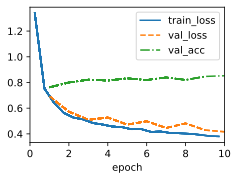

In [14]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### **5.2.2. 多层感知机的简洁实现（Concise Implementation）**

**5.2.2.1. 模型（Model）**

In [15]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

**5.2.2.2. 训练（Training）**

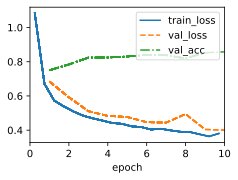

In [16]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## **5.3. 正向传播、反向传播和计算图（Forward Propagation, Backward Propagation, and Computational Graphs）**

前面几节里我们使用了小批量随机梯度下降的优化算法来训练模型。在实现中，我们只提供了模型的 **正向传播（*forward propagation*）** 的计算，即对输入计算模型输出，然后通过 `autograd` 模块来调用系统自动生成的 `backward` 函数计算梯度。基于 **反向传播（*back-propagation*）** 算法的自动求梯度极大简化了深度学习模型训练算法的实现。

### **5.3.1. 正向传播（Forward Propagation）**

**正向传播（*Forward propagation*）** 是指对神经网络沿着从输入层到输出层的顺序，依次计算并存储模型的中间变量（包括输出）。为简单起见，假设输入是一个特征为 $\mathbf{x}\in \mathbb{R}^d$ 的样本，且不考虑偏差项，那么中间变量

$$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x},$$

其中 $\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$ 是隐藏层的权重参数。把中间变量 $\mathbf{z}\in \mathbb{R}^h$ 输入按元素运算的激活函数 $\phi$ 后，将得到向量长度为  $\mathbf{h}$ 的隐藏层变量

$$\mathbf{h}= \phi (\mathbf{z}).$$

隐藏层变量 $\mathbf{h}$ 也是一个中间变量。假设输出层参数只有权重 $\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$ ，可以得到向量长度为 $q$ 的输出层变量

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

假设损失函数为 $l$，且样本标签为 $y$，可以计算出单个数据样本的损失项

$$L = l(\mathbf{o}, y).$$

根据 $\ell_2$ 范数正则化的定义，给定超参数 $\lambda$，正则化项即

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right),$$

其中矩阵的 Frobenius 范数等价于将矩阵变平为向量后计算  $\ell_2$ 范数。最终，模型在给定的数据样本上带正则化的损失为

$$J = L + s.$$

我们将 $J$ 称为有关给定数据样本的目标函数，并在以下的讨论中简称 **目标函数（*objective function*）**。

### **5.3.2. 正向传播的计算图（Computational Graph of Forward Propagation）**

我们通常绘制计算图来可视化运算符和变量在计算中的依赖关系。下图绘制了本节中样例模型正向传播的计算图，其中左下角是输入，右上角是输出。可以看到，图中箭头方向大多是向右和向上，其中方框代表变量，圆圈代表运算符，箭头表示从输入到输出之间的依赖关系。

<center><img src="https://drive.google.com/uc?export=view&id=1FdDnHEobujtYdkR8YyVst9CjWdmFrpoN" width=450px /></center>


### **5.3.3. 反向传播（Backpropagation）**

**反向传播（*Backpropagation*）** 指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度。对输入或输出 $\mathsf{X}, \mathsf{Y}, \mathsf{Z}$ 为任意形状张量的函数 $\mathsf{Y}=f(\mathsf{X})$ 和 $\mathsf{Z}=g(\mathsf{Y})$，通过链式法则，我们有

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

其中 $\text{prod}$ 运算符将根据两个输入的形状，在必要的操作（如转置和互换输入位置）后对两个输入做乘法。

回顾一下本节中样例模型，它的参数是 $\mathbf{W}^{(1)}$ 和 $\mathbf{W}^{(2)}$，因此反向传播的目标是计算 $\partial J/\partial \mathbf{W}^{(1)}$ $\partial J/\partial \mathbf{W}^{(2)}$。我们将应用链式法则依次计算各中间变量和参数的梯度，其计算次序与前向传播中相应中间变量的计算次序恰恰相反。首先，分别计算目标函数 $J=L+s$ 有关损失项 $L$ 和正则项 $s$ 的梯度

$$\frac{\partial J}{\partial L} = 1 \; \text{and} \; \frac{\partial J}{\partial s} = 1.$$


接下来，我们根据链式规则，计算目标函数相对于输出层 $\mathbf{o}$ 变量的梯度

$$
\frac{\partial J}{\partial \mathbf{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

接下来，计算正则项有关两个参数的梯度：

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

现在，我们可以计算最靠近输出层的模型参数的梯度 $\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$。依据链式法则，得到

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$

沿着输出层向隐藏层继续反向传播，隐藏层变量的梯度 $\partial J/\partial \mathbf{h} \in \mathbb{R}^h$ 可以这样计算：

$$
\frac{\partial J}{\partial \mathbf{h}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$

由于激活函数 $\phi$ 是按元素运算的，中间变量 $\mathbf{z}$ 的梯度 $\partial J/\partial \mathbf{z} \in \mathbb{R}^h$ 的计算需要使用按元素乘法符  $\odot$：

$$
\frac{\partial J}{\partial \mathbf{z}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

最终，我们可以得到最靠近输入层的模型参数的梯度 $\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$


### **5.3.4. 训练深度学习模型（Training Neural Networks）**

在训练深度学习模型时，正向传播和反向传播之间相互依赖。在模型参数初始化完成后，我们交替地进行正向传播和反向传播，并根据反向传播计算的梯度迭代模型参数。既然我们在反向传播中使用了正向传播中计算得到的中间变量来避免重复计算，那么这个复用也导致正向传播结束后不能立即释放中间变量内存。这也是训练要比预测占用更多内存的一个重要原因。另外需要指出的是，这些中间变量的个数大体上与网络层数线性相关，每个变量的大小跟批量大小和输入个数也是线性相关的，它们是导致较深的神经网络使用较大批量训练时更容易超内存的主要原因。

##**5.4. 数值稳定性和模型初始化（Numerical Stability and Initialization）**

### **5.4.1. 衰减和爆炸（Vanishing and Exploding Gradients）**

当神经网络的层数较多时，模型的数值稳定性容易变差。假设一个层数为 $L$ 的多层感知机的第 $l$ 层 $H^{(l)}$ 的权重参数为 $W^{(l)}$，输出层 $H^{(L)}$ 的权重参数为 $W^{(L)}$。为了便于讨论，不考虑偏差参数，且设所有隐藏层的激活函数为恒等映射（identity mapping）$\phi(x)=x$。给定输入 $X$ ，多层感知机的第 $l$ 层的输出 $H^{(l)}=XW^{(1)}W^{(2)}\cdots W^{(l)}$。此时，如果层数 $l$ 较大，$H^{(l)}$ 的计算可能会出现衰减或爆炸。举个例子，假设输入和所有层的权重参数都是标量，如权重参数为 0.2 和 5，多层感知机的第 30 层输出为输入 $X$ 分别与 $0.2^{30}≈1×10^{−21}$（衰减）和 $5^{30}≈9×10^{20}$（爆炸）的乘积。类似地，当层数较多时，梯度的计算也更容易出现 **衰减（*vanishing gradient*）** 或 **爆炸（*exploding gradient*）**。

### **5.4.2. 初始化模型参数（Parameter Initialization）**

解决或至少缓解上述问题的一个方法是通过仔细的初始化。在优化和适当的正则化过程中的可以进一步提高稳定性。

**5.4.2.1. 默认随机初始化（Default Initialization）**

假设输出层只保留一个输出单元 $o_{1}$，且隐藏层使用相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输入计算出相同的值，并传递至输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使用基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。在这种情况下，无论隐藏单元有多少，**隐藏层本质上只有1个隐藏单元在发挥作用**。因此，正如在前面的实验中所做的那样，我们通常将神经网络的模型参数，特别是权重参数，进行随机初始化。

**5.4.2.2. Xavier随机初始化（Xavier Initialization）**

还有一种比较常用的随机初始化方法叫作 **Xavier随机初始化（*Xavier Initialization*）**。 假设某全连接层的输入个数为 $\mathrm{in}$，输出个数为 $\mathrm{out}$，Xavier 随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布

$$U\left(-\sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}, \sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}\right).$$

它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

##**5.5. 深度学习中的泛化问题（Generalization in Deep Learning）**

###**5.5.3. 提前停止（Early Stopping）**

当训练大型模型时，我们很容易发生过度拟合问题。我们经常观察到训练误差随时间稳定下降，但验证集误差却开始上升。这意味着我们可以通过返回到具有最低验证集错误的时间点的参数设置来获得更好的模型。每次验证集的错误数值得到改善时，我们都会存储模型参数的副本。当训练算法终止时，我们返回这些参数，而不是最新的参数。当所有的参数都无法得到改进，提升验证集的错误数值时，算法终止。

这种策略被称为 **提前停止（*Early Stopping*）**。它可能是深度学习中最常用的正则化方式。 它的流行是由于它的有效性和它的简单性。

提前停止是一种非常不显眼的正则化方式，因为它几乎不需要改变底层训练过程、目标函数或一组允许的参数值。 这意味着在不损害学习动力的情况下很容易使用提前停止。

提前停止可以单独使用，也可以与其他正则化策略结合使用。提前停止还可以有效降低训练过程的计算成本。

## **5.6. 丢弃法（Dropout）**

### **5.6.1. 实践中的丢弃法（Dropout in Practice）**

下图中左边的 MLP 的带有一个隐藏层和5个隐藏单元。当我们对隐藏层应用 **丢弃法（*dropout*）** 时，以概率 $p$ 将每个隐藏单元清零，其结果可以被看作是一个只包含原始神经元子集的网络。在右边图中，$h_2$ 和 $h_5$ 被移除了。因此，输出的计算不再依赖于 $h_2$ 或 $h_5$，在进行反向传播时，它们各自的梯度也消失了。这样，输出层的计算就不会过度依赖 $h_1, \ldots, h_5$ 的任何一个元素。从而在训练模型时起到正则化的作用，并可以用来应对过拟合。在测试模型时，我们为了拿到更加确定性的结果，一般不使用丢弃法。

<center><img src="https://drive.google.com/uc?export=view&id=1UdnAy248lxPxrouHMgh5l4ZD-lvcSbsm" width=550px /></center>


### **5.6.2. 从零开始实现（Implementation from Scratch）**

为了实现单层的 dropout 功能，我们必须从伯努利（二进制）随机变量中抽取与我们的层的维数相同的样本，其中随机变量的值为 **1**（保留），概率为 $1-p$，**0**（放弃），概率为 $p$。一个简单的实现方法是，首先从均匀分布 $U[0, 1]$ 中抽取样本。然后我们可以保留那些相应的样本大于  $p$ 的节点，放弃其余的节点。

In [18]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return torch.zeros_like(X)
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [19]:
X = torch.arange(16, dtype = torch.float32).reshape((2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
dropout_p = 0.5: tensor([[ 0.,  0.,  0.,  6.,  8., 10., 12.,  0.],
        [ 0.,  0.,  0.,  0., 24.,  0.,  0.,  0.]])
dropout_p = 1: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


**5.6.2.1. 定义模型（Defining the Model）**

In [20]:
class DropoutMLPScratch(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = nn.LazyLinear(num_hiddens_1)
        self.lin2 = nn.LazyLinear(num_hiddens_2)
        self.lin3 = nn.LazyLinear(num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((X.shape[0], -1))))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.relu(self.lin2(H1))
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

**5.6.2.2. 训练（Training）**

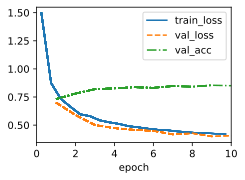

In [21]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

###**5.6.3. 简洁实现（Concise Implementation）**

有了高级的API，我们需要做的就是在每个全连接层之后添加一个 `Dropout` 层，将 dropout 概率作为唯一的参数传递给它的构造函数。在训练过程中，`Dropout` 层将根据指定的 dropout 概率随机地丢弃前一层的输出（或者相当于丢弃后续层的输入）。当不处于训练模式时，`Dropout` 层**只是在测试过程中传递数据**。

In [22]:
class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(), nn.LazyLinear(num_hiddens_1), nn.ReLU(),
            nn.Dropout(dropout_1), nn.LazyLinear(num_hiddens_2), nn.ReLU(),
            nn.Dropout(dropout_2), nn.LazyLinear(num_outputs))

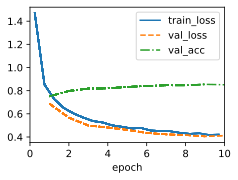

In [23]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

In [24]:
%%shell
jupyter nbconvert --to html 05_D2L_Multilayer_Perceptrons.ipynb

[NbConvertApp] Converting notebook 05_D2L_Multilayer_Perceptrons.ipynb to html
[NbConvertApp] Writing 717132 bytes to 05_D2L_Multilayer_Perceptrons.html
